In [30]:
import os
import pandas as pd
from scipy.io import loadmat
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

train_dir = os.path.join('./data', 'cars_train')
test_dir = os.path.join('./data', 'cars_test')
devkir_dir = os.path.join('./data', 'devkit')

cars_meta = loadmat(os.path.join(devkir_dir,'cars_meta.mat'))
cars_train_annos = loadmat(os.path.join(devkir_dir,'cars_train_annos.mat'))
cars_test_annos = loadmat(os.path.join(devkir_dir,'cars_test_annos.mat'))

def load_dataframe_with_bounding_box():
    cars_meta = loadmat(os.path.join(devkir_dir,'cars_meta.mat'))
    labels = [c for c in cars_meta['class_names'][0]]
    labels = pd.DataFrame(labels, columns=['labels'])
    
    train_columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
    frame = [[i.flat[0] for i in line] for line in cars_train_annos['annotations'][0]]
    df_train = pd.DataFrame(frame, columns=train_columns)
    df_train['class'] = df_train['class']-1 # Python indexing starts on zero.
    df_train = df_train.merge(labels, left_on='class', right_index=True)
    df_train = df_train.sort_index()
    
    test_columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'fname']
    frame = [[i.flat[0] for i in line] for line in cars_test_annos['annotations'][0]]
    df_test = pd.DataFrame(frame, columns=test_columns)
    
    return df_train, df_test

# def get_image(dir, row):
#     img = Image.open(os.path.join(dir, row['fname']), 'r')
#     img_crop = img.crop(
#         (row['bbox_x1']-20, row['bbox_y1']-20, row['bbox_x2']+20, row['bbox_y2']+20)
#     )
#     img_arr = np.array(img_crop)
#     return img_arr

# def load_image_by_dataframe():
#     df_train, df_test = load_dataframe_with_bounding_box()
#     df_train['image'] = df_train.apply(lambda row: get_image(train_dir, row), axis=1)
#     df_test['image'] = df_test.apply(lambda row: get_image(test_dir, row), axis=1)
#     return df_train, df_test

def create_generators():
    df_train, df_test = load_dataframe_with_bounding_box()
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        horizontal_flip=True,
    )
    train_generator = datagen.flow_from_dataframe(
        df_train,
        directory=os.path.join('./', train_dir),
        x_col='fname',
        y_col='class',
        target_size=(224, 224),
        subset='training',
        class_mode="other",
    )
    validation_generator = datagen.flow_from_dataframe(
        df_train,
        directory=os.path.join('./', train_dir),
        x_col='fname',
        y_col='class',
        target_size=(224, 224),
        subset='validation',
        class_mode="other",
    )
    test_generator = datagen.flow_from_dataframe(
        df_test,
        directory=os.path.join('./', test_dir),
        x_col='fname',
        target_size=(224, 224),
        class_mode=None,
    )
        
    return train_generator, validation_generator, test_generator

In [31]:
train_generator, validation_generator, test_generator = create_generators()

Found 6516 images.
Found 1628 images.
Found 8041 images.


the shape of tensor batch_x is: (32, 224, 224, 3)
the shape of tensor batch_y is: (32, 5)


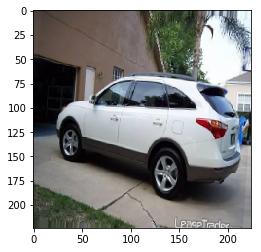

In [38]:
batch_x, batch_y = next(train_generator)
print('the shape of tensor batch_x is:', batch_x.shape)
print('the shape of tensor batch_y is:', batch_y.shape)
# batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
for i in range(batch_x.shape[0]):
#     print('x data', batch_x[i])
#     print('y data', batch_y[i])
    img = Image.fromarray(batch_x[i].astype('uint8'), 'RGB')
    plt.imshow(img)
    break

In [ ]:
def crop_generator(generator):
    while True:
        batch_x, batch_y = next(generator)
        print('the shape of tensor batch_x is:', batch_x.shape)
        print('the shape of tensor batch_y is:', batch_y.shape)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            print('y data': batch_y[i])
        yield (batch_crops, batch_y)


In [19]:
df_train.iloc[0]

bbox_x1                     39
bbox_y1                    116
bbox_x2                    569
bbox_y2                    375
class                       13
fname                00001.jpg
labels     Audi TTS Coupe 2012
Name: 0, dtype: object

In [15]:
import matplotlib.pyplot as plt

In [16]:
img = Image.open(os.path.join(train_dir, df_train.iloc[0].fname), 'r')
plt.imshow(img)

NameError: name 'df_train' is not defined

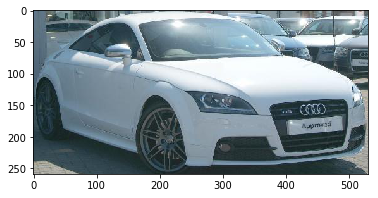

In [31]:

img_crop = img.crop((df_train.iloc[0].bbox_x1,df_train.iloc[0].bbox_y1,df_train.iloc[0].bbox_x2,df_train.iloc[0].bbox_y2))
plt.imshow(img_crop)

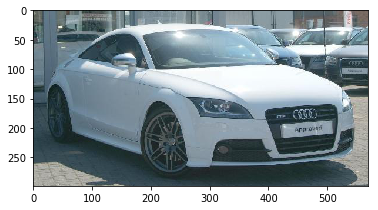

In [40]:
img_crop = img.crop((df_train.iloc[0].bbox_x1-20,df_train.iloc[0].bbox_y1-20,df_train.iloc[0].bbox_x2+20,df_train.iloc[0].bbox_y2+20))
plt.imshow(img_crop)

In [14]:
import numpy as np
img_arr = np.array(img_crop)
img_arr.shape

NameError: name 'img_crop' is not defined